In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

Mounted at /content/drive


In [2]:
# Import data
df_boston = pd.read_excel(r'/content/drive/MyDrive/Practice/Regression/Data/Boston.xlsx', sheet_name=0)
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


# Linear Regression

42716.29541501977


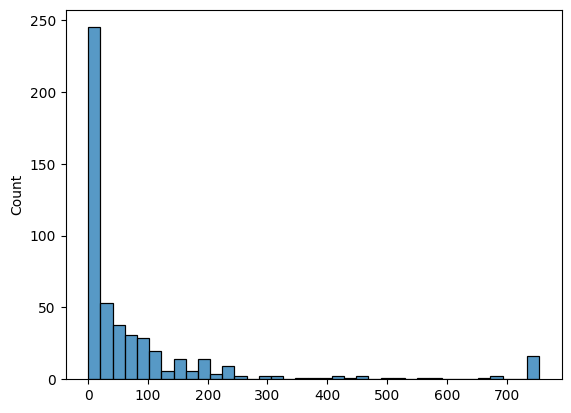

In [3]:
# Using statistical mean as prediction of MEDV (baseline)
df_boston['MEAN_PRED'] = df_boston.loc[:,'MEDV'].mean()

# Visualise distribution of error
squared_error = (df_boston.MEAN_PRED - df_boston.MEDV)**2
sns.histplot(squared_error)
# Most errors are around 0, but considerable number of errors far away from 0.
# Errors are squared, so effect is emphasised.

# Calculate SSE
sum_squared_error = np.sum((df_boston.MEAN_PRED - df_boston.MEDV)**2)
print(sum_squared_error)

In [4]:
# By OLS, using RM to predict MEDV (statsmodels.api)
y = df_boston['MEDV']
X = sm.add_constant(df_boston['RM'])
ols_1 = sm.OLS(y, X).fit()
coefficients_1 = ols_1.params           # Coefficients: B0, B1
predictions_1 = ols_1.predict(X)        # Using in-sample data set / training set
print(ols_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.49e-74
Time:                        06:10:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.0

In [5]:
# By OLS, using RM to predict MEDV (statsmodels.formula.api)
ols_2 = smf.ols(formula='MEDV ~ RM', data=df_boston).fit()
coefficients_2 = ols_2.params           # Coefficients: B0, B1
predictions_2 = ols_2.predict(X)        # Using in-sample data set / training set
print(ols_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Mon, 25 Dec 2023   Prob (F-statistic):           2.49e-74
Time:                        06:10:28   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [ ]:
# To predict out-of-sample forecast (statsmodels)
# Apply new data to vector of coefficients by matrix multiplication
ols_1.predict([1, 5])       # Variable data and intercept (column of ones for B0/intercept)

# To predict out-of-sample forecast (manually)
# Calculate Y via matrix multiplication
np.dot(X, ols_1.params)     # X = matrix containing variable data and intercept (a column of ones), ols_1.params = coefficient vectors

In [7]:
# By OLS, using RM to predict MEDV (sklearn)
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training/testing sets
x_train = df_boston['RM'][:-20].values.reshape((len(df_boston['RM'][:-20]), 1))     # X should be always a matrix, never a vector
x_test = df_boston['RM'][-20:].values.reshape((len(df_boston['RM'][-20:]), 1))

# Split the targets into training/testing sets
y_train = df_boston['MEDV'][:-20]       # y can be a vector
y_test = df_boston['MEDV'][-20:]

# Create linear regression object
linear_regression = linear_model.LinearRegression()

# Train the model using the training sets
linear_regression.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = linear_regression.predict(x_test)

# Assessing predictions
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))

# Coefficients
print(linear_regression.coef_)          # vector of the coefficients
print(linear_regression.intercept_)     # intercept

18.729140057373765
0.1989281458430988
[9.126359]
-34.78563691155831


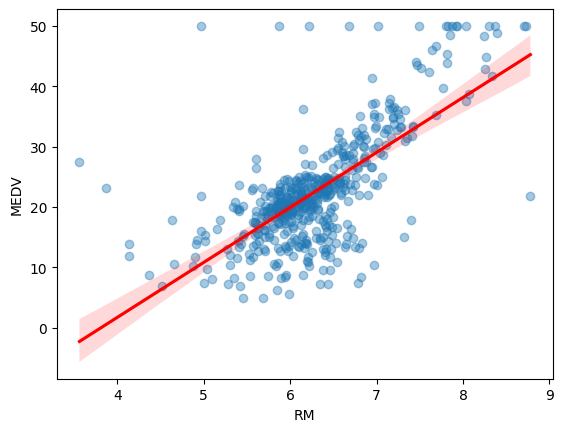

In [8]:
# Plotting best fit line (MEDV against RM)
sns.regplot(x=df_boston['RM'], y=df_boston['MEDV'], scatter_kws={'alpha':0.4}, line_kws={"color": "red"});

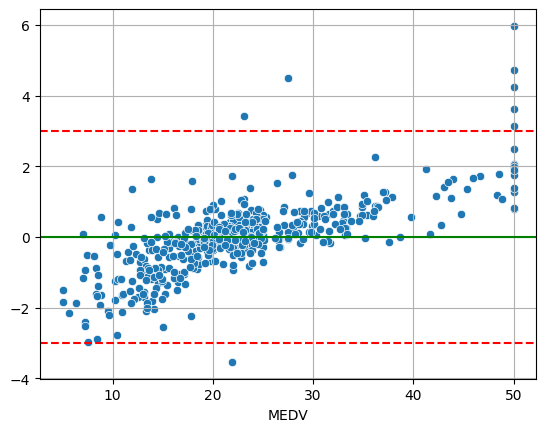

In [9]:
# Plotting residuals to check for random distribution
# residuals = target values - fitted/predicted values
# Need to standardize residuals, (x - mu)/sigma ~ N(0,1)
# Then plot residual against target/independent variable

resid = df_boston['MEDV'] - predictions_2
normalised_resid = (resid - resid.mean()) / np.std(resid)

# Plotting
sns.scatterplot(x=df_boston['MEDV'], y=normalised_resid)
plt.axhline(0, color='green')                    # Mean = 0
plt.axhline(3, color='red', linestyle='--')      # Upper range of 3 SD
plt.axhline(-3, color='red', linestyle='--')     # Lower range of 3 SD
plt.grid(True)

# Intuition:
# 1. A few points lie outside 3 SD -> strong signal that regression underperforms
# 2. Points are not randomly scattered and show different variances at different values of X
# 3. Points are forming logarithmic shape
# Therefore, residuals are not randomly/normally distributed


## Multiple Linear Regression

In [10]:
# By OLS, using all variables to predict MEDV (statsmodels.api)
y = df_boston.iloc[:,-1]
X = sm.add_constant(df_boston.iloc[:,:-1])
ols_4 = sm.OLS(y, X).fit()
coefficients_4 = ols_4.params
predictions_4 = ols_4.predict(X)
print(ols_4.summary())

                            OLS Regression Results                            
Dep. Variable:              MEAN_PRED   R-squared:                      -6.178
Model:                            OLS   Adj. R-squared:                 -6.383
Method:                 Least Squares   F-statistic:                    -30.19
Date:                Mon, 25 Dec 2023   Prob (F-statistic):               1.00
Time:                        06:10:34   Log-Likelihood:                 15268.
No. Observations:                 506   AIC:                        -3.051e+04
Df Residuals:                     491   BIC:                        -3.044e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328   2.18e-14   1.03e+15      0.0

In [11]:
# By OLS, using all variables to predict MEDV (statsmodels.formula.api)
ols_5 = smf.ols(formula='MEDV ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', data=df_boston).fit()
coefficients_5 = ols_5.params           # Coefficients: B0, B1
predictions_5 = ols_5.predict(X)        # Using in-sample data set / training set
print(ols_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          6.72e-135
Time:                        06:10:34   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.0

In [12]:
# Fit of multiple linear regression:
# 1. if (r^2 - adjusted r^2 / adjusted r^2) > 20%, then many redundant variables inside model specification.
# 2. variables with low p-value are not significantly different from 0, and should be removed in statistical approach (but not in data science approach)
# 3. condition number (Cond. No.) > 30, signal that unstable results are rendering the result less reliable / multicollinearity

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

<Axes: >

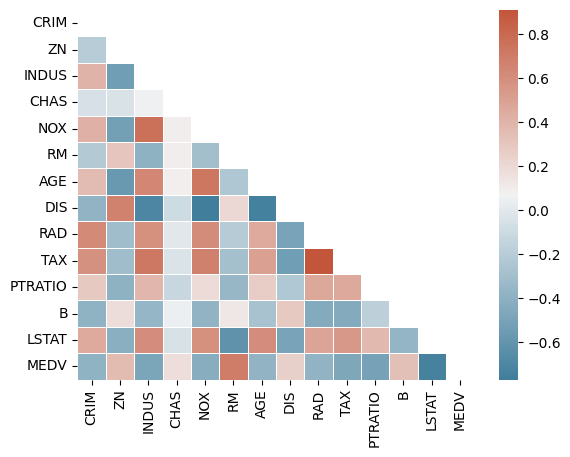

In [13]:
# Correlation matrix
# To identify correlation between predictors (collinearity)
df_corr = df_boston.iloc[:,:-1].corr()
print(df_corr)

mask = np.triu(np.ones_like(df_corr, dtype=bool))       # Plot half triangle
cmap = sns.diverging_palette(230, 20, as_cmap=True)     # Set colour map
sns.heatmap(df_corr, cmap=cmap, linewidth=0.5, mask=mask)

# Polynomial Regression

In [14]:
# 3rd order polynomial
ols_poly = smf.ols(formula='MEDV ~ LSTAT + I(LSTAT ** 2.0) + I(LSTAT ** 3.0)', data=df_boston).fit()
print(ols_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Mon, 25 Dec 2023   Prob (F-statistic):          1.78e-116
Time:                        06:10:36   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          48.6496      1.435     

# Appendix

In [ ]:
# Calculating squared sum of errors (SSE)
def sse(target: pd.Series, actual: pd.Series) -> float:
    import numpy as np
    sse = np.sum((target - actual)**2)
    return round(sse, 2)

In [ ]:
# Calculating Z-score standardisation
def standardise(s: pd.Series, ddof=0) -> pd.Series:
    return (s - s.mean()) / s.std(ddof=ddof)

In [ ]:
# Calculating correlation
from scipy.stats import pearsonr
pearsonr(df_boston.CRIM, df_boston.NOX)

# Variables have to be standardise/in same scale first (automatically done by pandas/numpy/scipy)
# eg. z-score standardization

In [ ]:
# R_squared (square of correlation coefficient)
from scipy.stats import pearsonr
(pearsonr(df_boston.CRIM, df_boston.NOX)[0])**2